In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [125]:
data = pd.read_csv('Bank_loan.csv')

In [126]:
# Display Top 5 Rows of The Dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [127]:
#Check Last 5 Rows of The Dataset
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [128]:
#Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [129]:
# Describe the numerical data

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [230]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
Credit_History         2
Property_Area          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Loan_Status            2
dtype: int64

In [131]:
# we will drop ID because it's not important for our model and it will just mislead the model

data.drop('Loan_ID', axis=1, inplace=True)

In [132]:
#change the type of Credit_History to object becaues we can see that it is 1 or 0

data['Credit_History'] = data['Credit_History'].astype('O')

In [133]:
data.describe(include='O')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,564.0,614,614
unique,2,2,4,2,2,2.0,3,2
top,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,489,398,345,480,500,475.0,233,422


In [134]:
#Check Null Values In The Dataset
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [135]:
# We will separate the numerical columns from the categorical

cat_data = []
num_data = []

for i,c in enumerate(data.dtypes):
    if c == object:
        cat_data.append(data.iloc[:, i])
    else :
        num_data.append(data.iloc[:, i])

In [136]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [137]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [138]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [139]:
# cat_data
# If you want to fill every column with its own most frequent value you can use

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data 

False

In [140]:
# num_data
# fill every missing value with their mean value in the same column

num_data.fillna(num_data.mean(), inplace=True)
num_data.isnull().sum().any() # no more missing data

False

In [141]:
# cat_data
# If you want to fill every column with its own most frequent value you can use

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data

False

The percentage of Y class : 0.69
The percentage of N class : 0.31


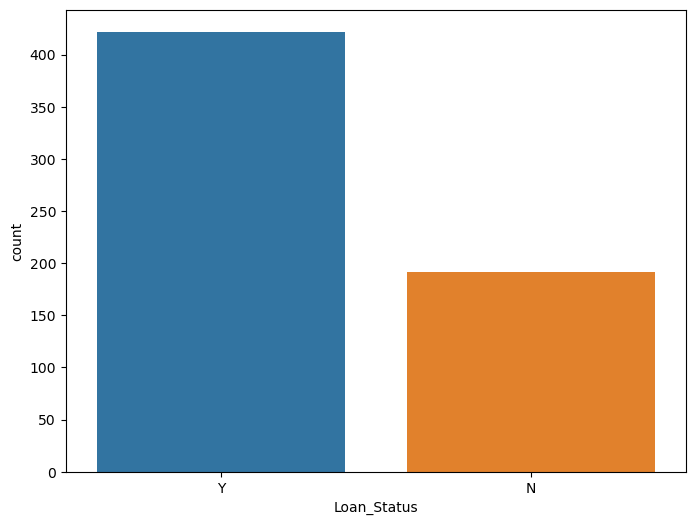

In [144]:
# let's look at the target percentage

plt.figure(figsize=(8,6))
sns.countplot(data['Loan_Status']);

print('The percentage of Y class : %.2f' % (data['Loan_Status'].value_counts()[0] / len(data)))
print('The percentage of N class : %.2f' % (data['Loan_Status'].value_counts()[1] / len(data)))


In [145]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [146]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


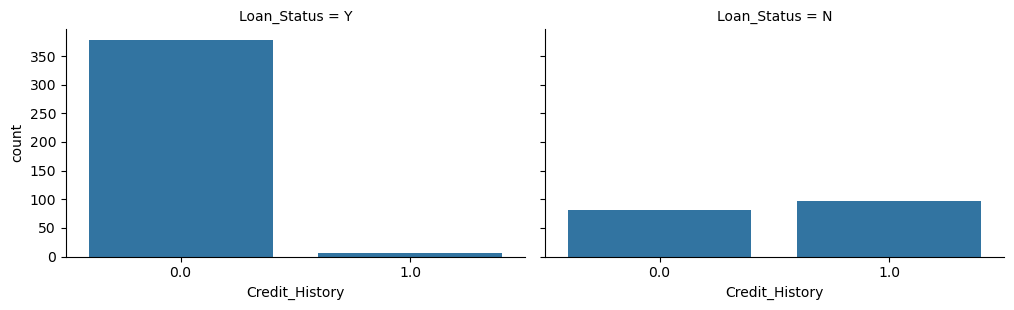

In [147]:
# Credit_History

grid = sns.FacetGrid(data,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

# we didn't give a loan for most people who got Credit History = 0
# but we did give a loan for most of people who got Credit History = 1
# so we can say if you got Credit History = 1 , you will have better chance to get a loan

# important feature

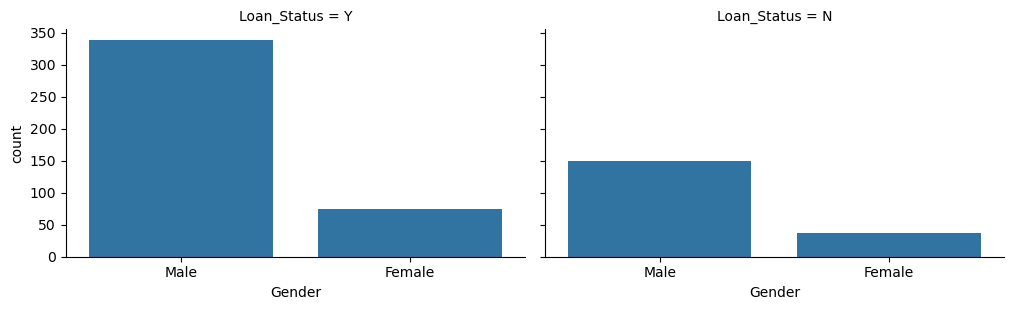

In [148]:
# Gender

grid = sns.FacetGrid(data,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');

# most males got loan and most females got one too so (No pattern)

# i think it's not so important feature, we will see later


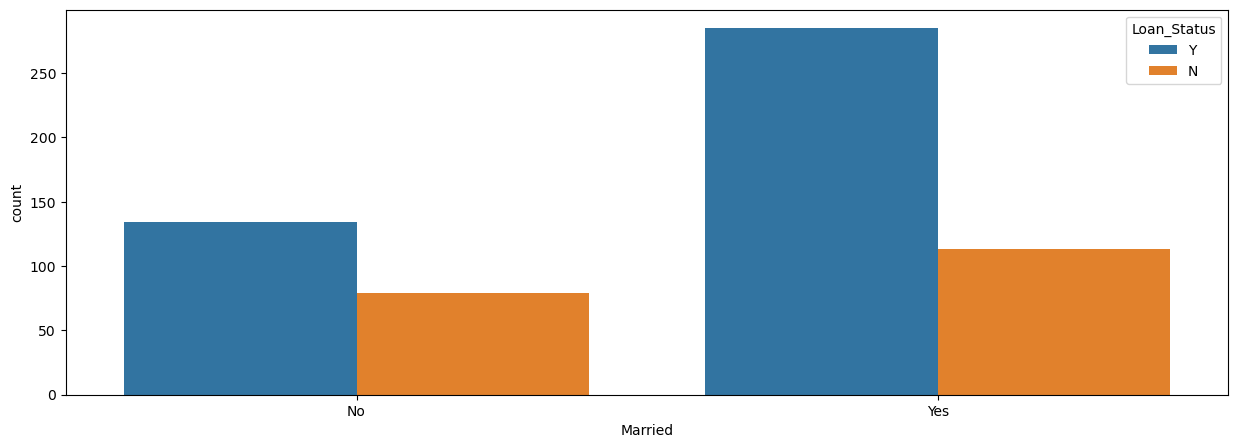

In [149]:
# Married

plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=data);

# most people who get married did get a loan
# if you'r married then you have better chance to get a loan :)
# good feature

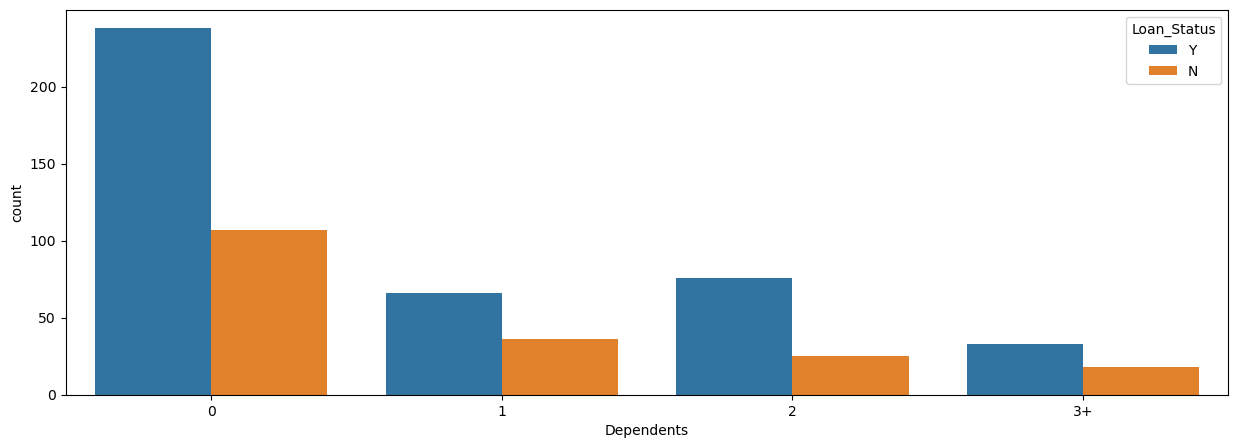

In [150]:
# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=data);

# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

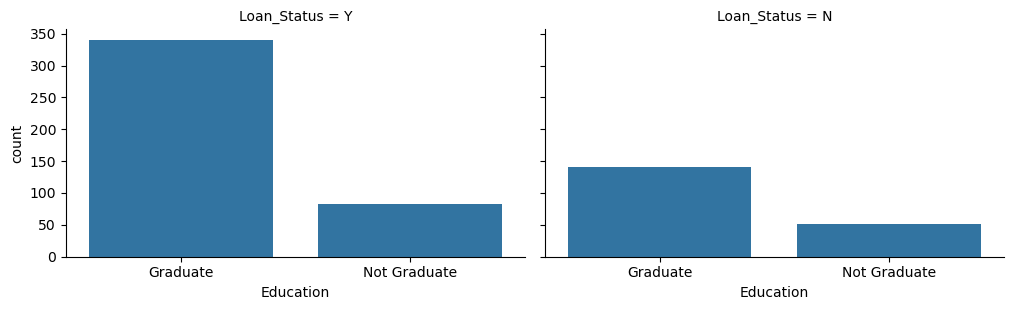

In [151]:
# Education

grid = sns.FacetGrid(data,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
# Here you can see that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

# not important feature

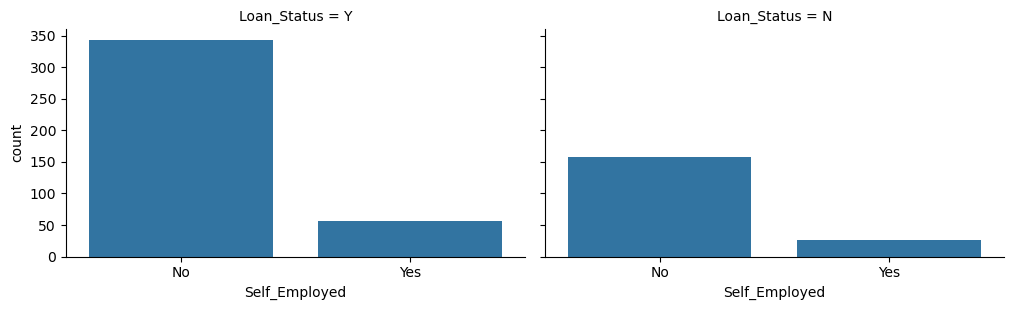

In [152]:
# Self_Employed

grid = sns.FacetGrid(data,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

# No pattern (same as Education)

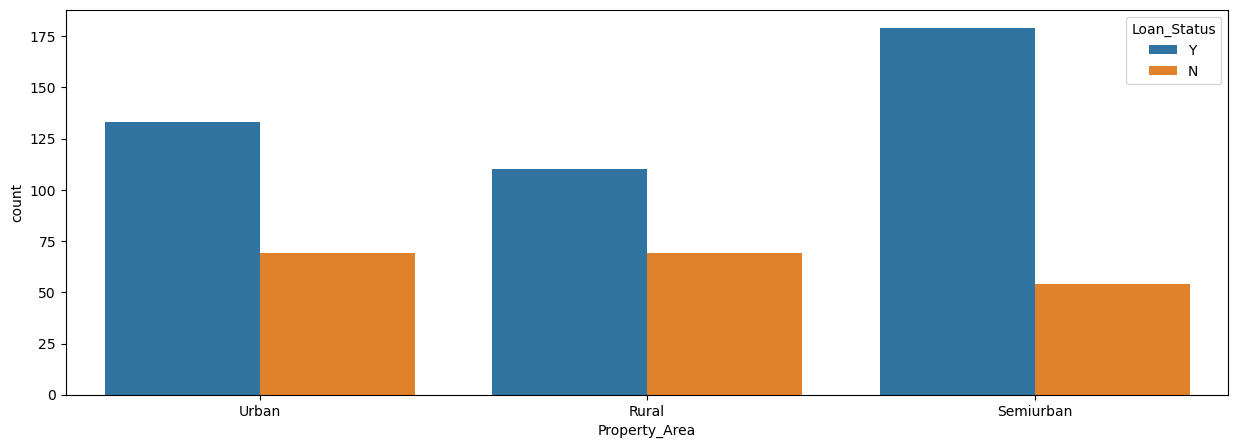

In [153]:
# Property_Area

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=data);

# We can say, Semiurban Property_Area got more than 50% chance to get a loan

# good feature

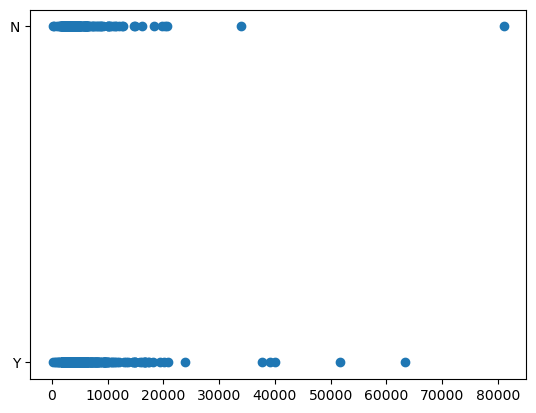

In [154]:
# ApplicantIncome

plt.scatter(data['ApplicantIncome'], data['Loan_Status']);

# No pattern

In [155]:
# the numerical data

data.groupby('Loan_Status').median() # median because Not affected with outliers

# we can see that when we got low median in CoapplicantInocme we got Loan_Status = N

# CoapplicantInocme is a good feature

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


In [156]:
#Labeling

from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [157]:
# transform the target column

target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [158]:
# transform other columns

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [159]:
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [160]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [162]:
data = pd.concat([cat_data, num_data, target], axis=1)

In [163]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,146.412162,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.000000,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.000000,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.000000,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.000000,360.0,0


In [165]:
#Train the data

X = pd.concat([cat_data, num_data], axis=1)
y = target 

In [166]:
y

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int64

In [167]:
#Feature Scaling

data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,146.412162,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.000000,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.000000,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.000000,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.000000,360.0,0


In [168]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [169]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [170]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,0,0,1,2,0.072991,-0.554487,0.000000,0.279851
1,1,1,1,0,0,1,0,-0.134412,-0.038732,-0.219273,0.279851
2,1,1,0,0,1,1,2,-0.393747,-0.554487,-0.957641,0.279851
3,1,1,0,1,0,1,2,-0.462062,0.251980,-0.314547,0.279851
4,1,0,0,0,0,1,2,0.097728,-0.554487,-0.064454,0.279851
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,-0.410130,-0.554487,-0.898095,0.279851
610,1,1,3,0,0,1,0,-0.212557,-0.554487,-1.267279,-2.518655
611,1,1,1,0,0,1,2,0.437174,-0.472404,1.269371,0.279851
612,1,1,2,0,0,1,2,0.357064,-0.554487,0.483367,0.279851


In [215]:
#Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import numpy as np

In [221]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=4)

In [222]:
model_df={}
def model_val(model,X,y):
   
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)
    

In [223]:
model_df

{}

In [224]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.7967479674796748
LogisticRegression() Avg cross val score is 0.8045715047314408


In [226]:
# Precision Score
y_pred=model.predict(X_test)
precision = precision_score(y_test, y_pred)

print("Precision Score:", precision)

Precision Score: 0.8947368421052632


In [227]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[81  2]
 [23 17]]


In [175]:
#SVC

from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7804878048780488
SVC() Avg cross val score is 0.7980407836865254


In [176]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.6910569105691057
DecisionTreeClassifier() Avg cross val score is 0.7198987071837932


In [178]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7479674796747967
RandomForestClassifier() Avg cross val score is 0.7866586698653871


In [179]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.7642276422764228
GradientBoostingClassifier() Avg cross val score is 0.7785019325603092


In [182]:
#Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV

In [184]:
#Logistic Regression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [185]:
rs_log_reg.best_score_

0.8062108489937359

In [186]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [198]:
#SVC

svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [199]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [200]:
rs_svc.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [201]:
rs_svc.best_score_

0.809462881514061

In [202]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

In [204]:
#Random Forest Classifier

RandomForestClassifier()

rf_grid={'n_estimators':np.arange(10,1000,10),
  'max_features':['auto','sqrt'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }

In [205]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [206]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 9

In [207]:
rs_rf.best_score_

0.8094628815140611

In [208]:
rs_rf.best_params_

{'n_estimators': 670,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [212]:
#LogisticRegression score Before Hyperparameter Tuning: 80.45
#LogisticRegression score after Hyperparameter Tuning: 80.62 
    

#SVC score Before Hyperparameter Tuning: 79.80
#SVC score after Hyperparameter Tuning: 80.94
    

#RandomForestClassifier score Before Hyperparameter Tuning: 78.66
#RandomForestClassifier score after Hyperparameter Tuning: 80.94 